In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

from pathlib import Path
from tqdm import tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.decomposition import PCA
from sklearn import preprocessing
import plotly.graph_objects as go
from visualize_attributes import * 

In [2]:
root_path = os.path.dirname(os.getcwd())
data_path = os.path.join(root_path, "data/data")
products = os.listdir(data_path)
number_of_product = len(products)
number_of_product

15

In [3]:
check_shape = True
check_embeddings = True
check_dist = True

The dataset contains 15 folders for 15 different product. Each folder contain a train set (all good images) and a test set (with different types of defect)

(900, 900, 3)


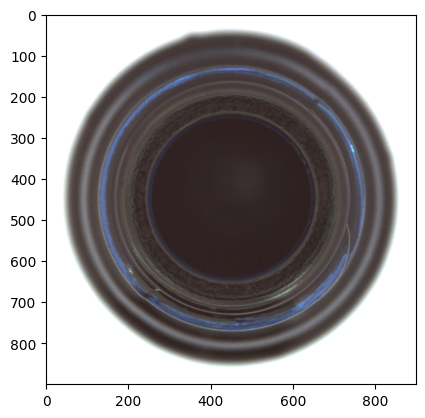

In [4]:
sample_image = cv2.imread(data_path + "/bottle/train/000.png", cv2.IMREAD_UNCHANGED)
print(sample_image.shape)
plt.imshow(sample_image)

In [5]:
sample_image.shape
resized_sample_image = cv2.resize(sample_image, (128,128))
resized_sample_image.ravel().shape

(49152,)

In [6]:
def data_analysis(data_path, check_shape=True, check_embeddings=True, check_dist=True, image_prefix='original_data'):
    # Check image shape of all types of product
    if check_shape:
        all_shape = all_image_shape(data_path)
        print(*all_shape.items(), sep="\n")

    # Check image embeddings
    if check_embeddings:
        embedded_images_dict, labels_dict = embeddings(data_path)
        
        fig, ax = plt.subplots(5, 3, figsize=(30, 50))
        fig.tight_layout(pad=5)
        plt.rcParams['axes.labelsize'] = 18
        plt.rcParams['axes.titlesize'] = 20
        
        label_encoder = preprocessing.LabelEncoder()
        for i in range(number_of_product):
            product = products[i]
        
            embedded_images = embedded_images_dict[product]
            labels = labels_dict[product]
            labels_number = label_encoder.fit_transform(labels)
            
            x, y = (int(i%3), int(i/3))
            scatter = ax[y, x].scatter(embedded_images[:, 0], embedded_images[:, 1], c=labels_number)
            ax[y, x].title.set_text(product)
            ax[y, x].set_xlabel('Principal Component 1')
            ax[y, x].set_ylabel('Principal Component 2')
            ax[y, x].legend(handles=scatter.legend_elements()[0], labels=np.unique(labels).tolist(), loc='upper right')
        fig.show()
        fig.savefig(root_path + '/Figure/' + image_prefix + '_each_class_embeddings.png')

    # Check class distribution
    if check_dist:
        labels_dict = class_distribution(data_path)
    
        fig, ax = plt.subplots(5, 3, figsize=(30, 50))
        fig.tight_layout(pad=5)
        plt.rcParams['axes.labelsize'] = 18
        plt.rcParams['axes.titlesize'] = 20
        for i in range(number_of_product):
            product = products[i]
            product_count = labels_dict[product]
            labels, count = list(product_count.keys()), list(product_count.values())
            
            x, y = (int(i%3), int(i/3))
            ax[y, x].pie(count, labels=labels, autopct=lambda x: np.round(x/100.*np.sum(count), 0))
            ax[y, x].title.set_text('Class distribution of '+ product)
            ax[y, x].legend()
        fig.show()
        fig.savefig(root_path + '/Figure/' + image_prefix + '_each_class_distribution.png')

('bottle', array([[900, 900]]))
('cable', array([[1024, 1024]]))
('capsule', array([[1000, 1000]]))
('carpet', array([[1024, 1024]]))
('grid', array([[1024, 1024]]))
('hazelnut', array([[1024, 1024]]))
('leather', array([[1024, 1024]]))
('metal_nut', array([[700, 700]]))
('pill', array([[800, 800]]))
('screw', array([[1024, 1024]]))
('tile', array([[840, 840]]))
('toothbrush', array([[1024, 1024]]))
('transistor', array([[1024, 1024]]))
('wood', array([[1024, 1024]]))
('zipper', array([[1024, 1024]]))


/tmp/ipykernel_28589/2418273452.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_28589/2418273452.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


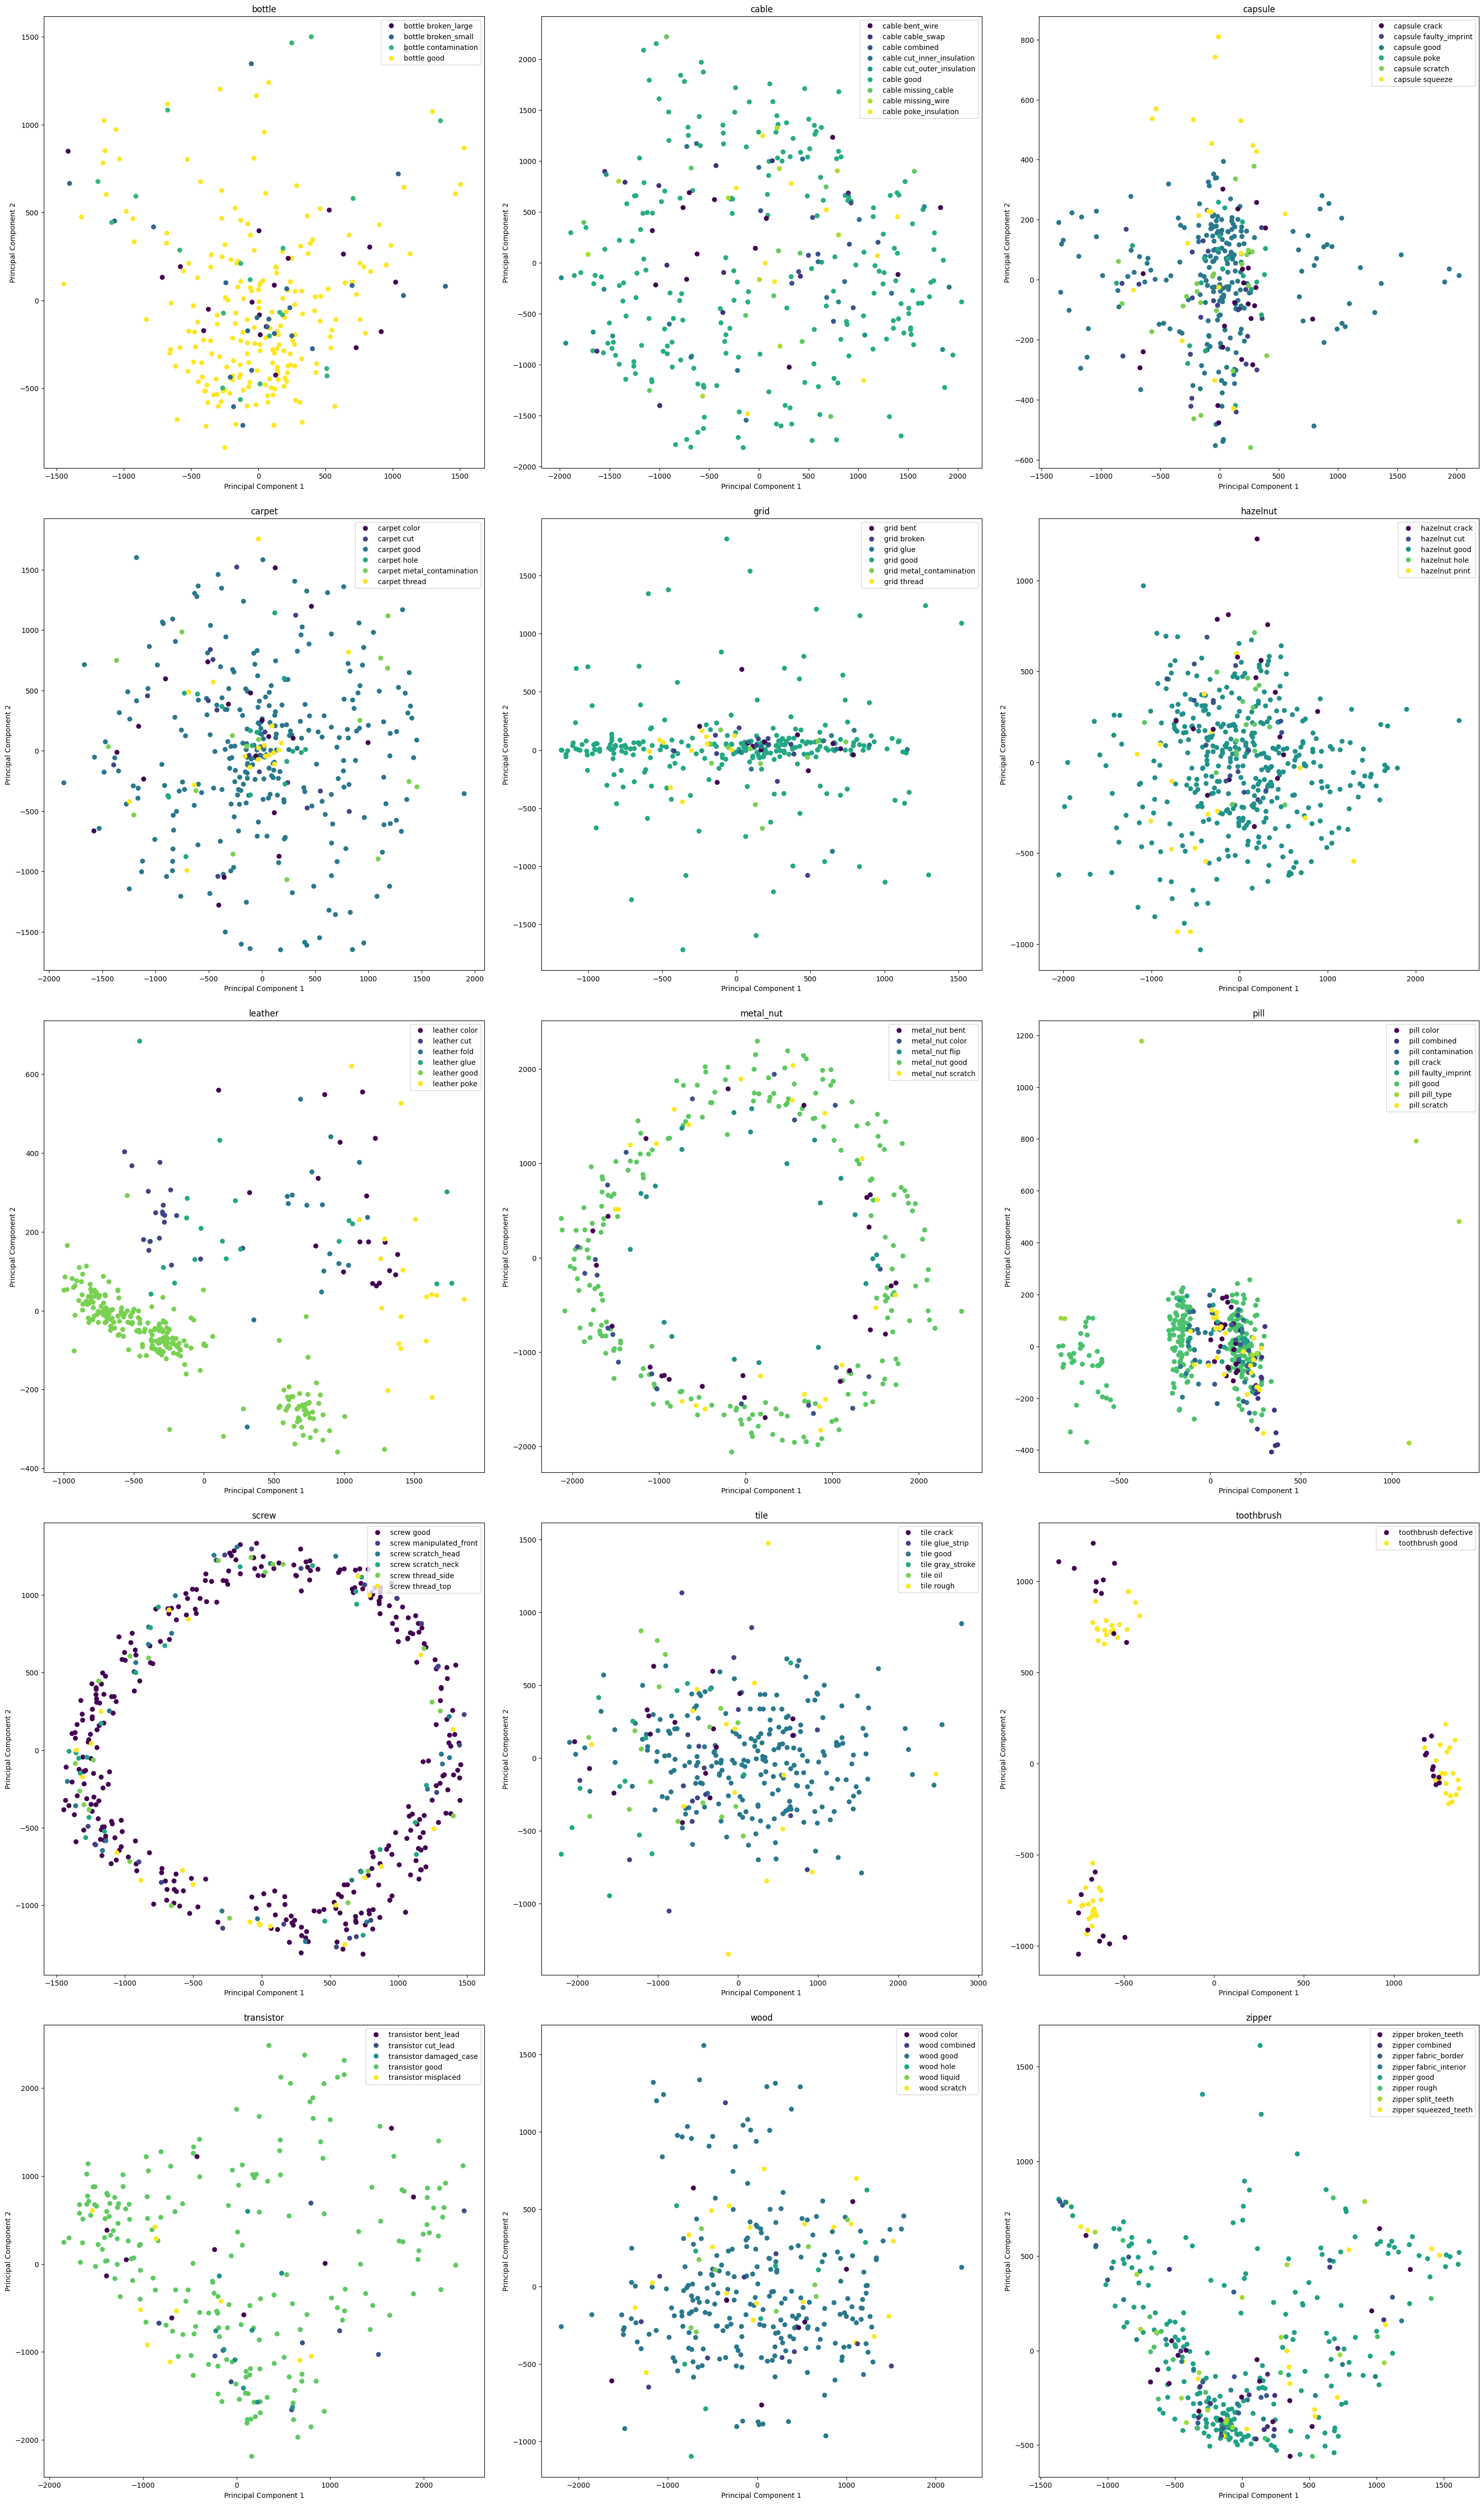

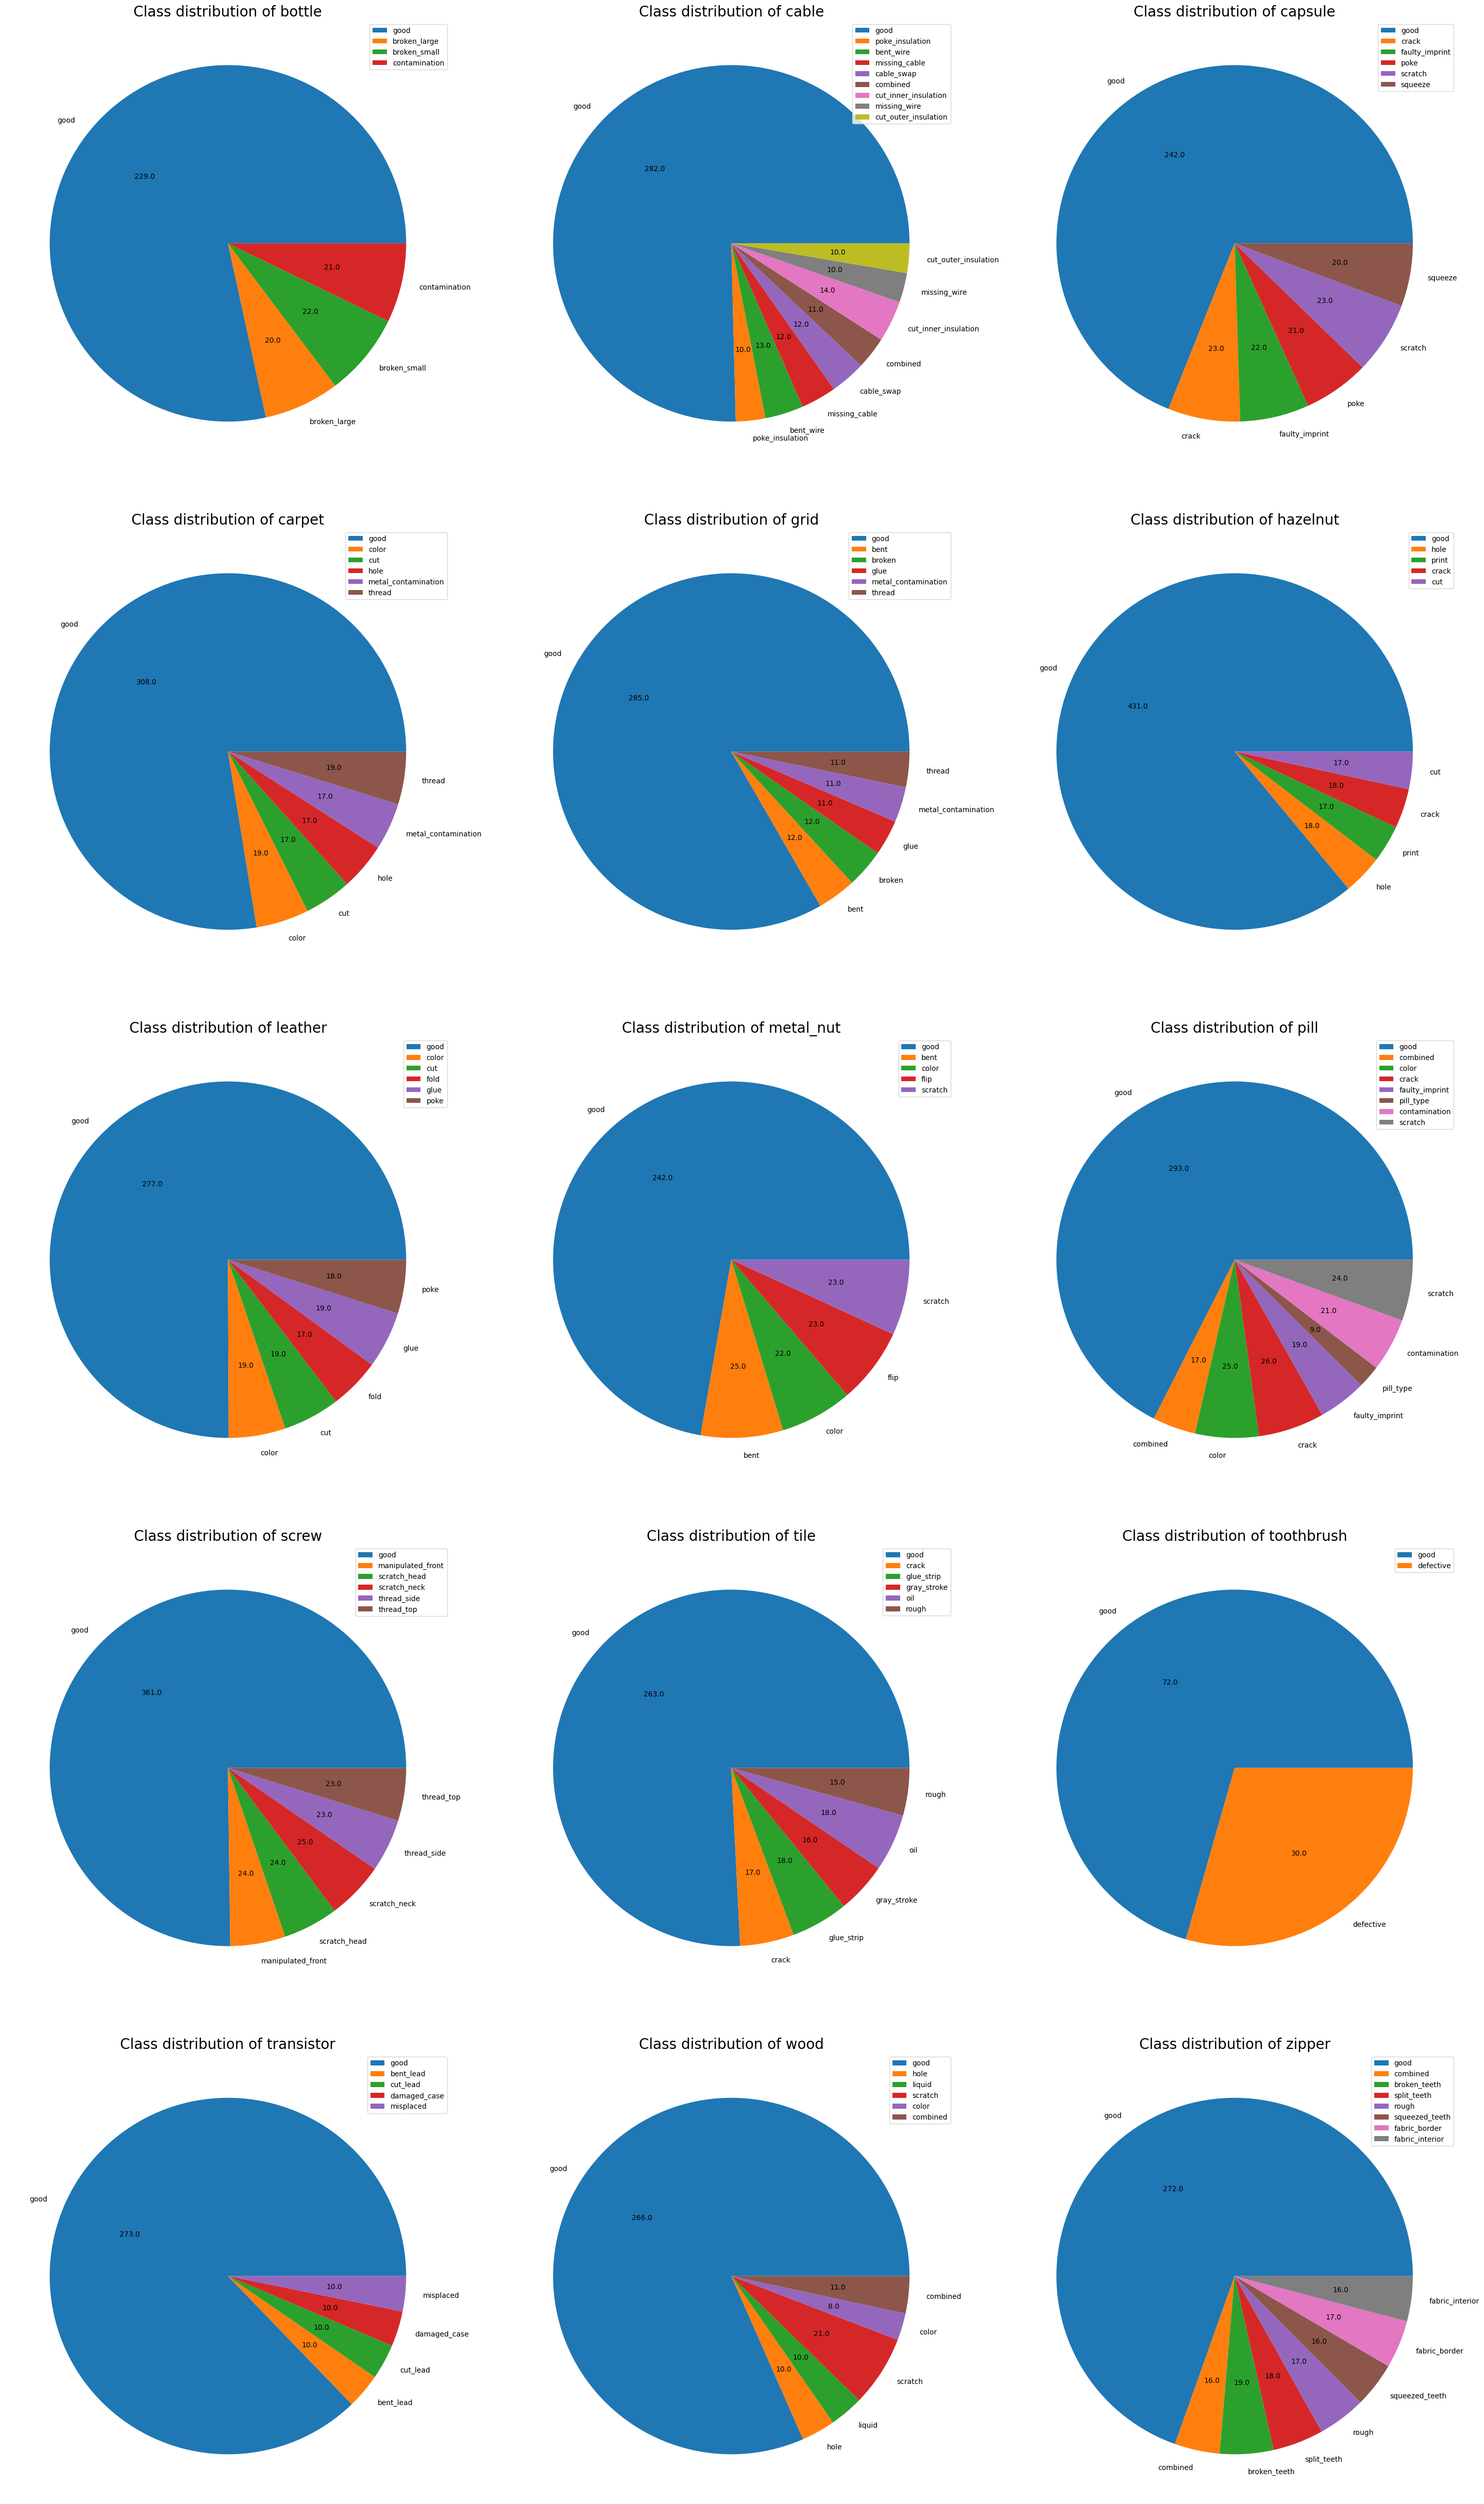

In [7]:
data_analysis(data_path, check_shape=True, check_embeddings=True, check_dist=True, image_prefix='original_data')

('bottle', array([[900, 900]]))
('cable', array([[1024, 1024]]))
('capsule', array([[1000, 1000]]))
('carpet', array([[1024, 1024]]))
('grid', array([[1024, 1024]]))
('hazelnut', array([[1024, 1024]]))
('leather', array([[1024, 1024]]))
('metal_nut', array([[700, 700]]))
('pill', array([[800, 800]]))
('screw', array([[1024, 1024]]))
('tile', array([[840, 840]]))
('toothbrush', array([[1024, 1024]]))
('transistor', array([[1024, 1024]]))
('wood', array([[1024, 1024]]))
('zipper', array([[1024, 1024]]))


/tmp/ipykernel_28589/2418273452.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_28589/2418273452.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


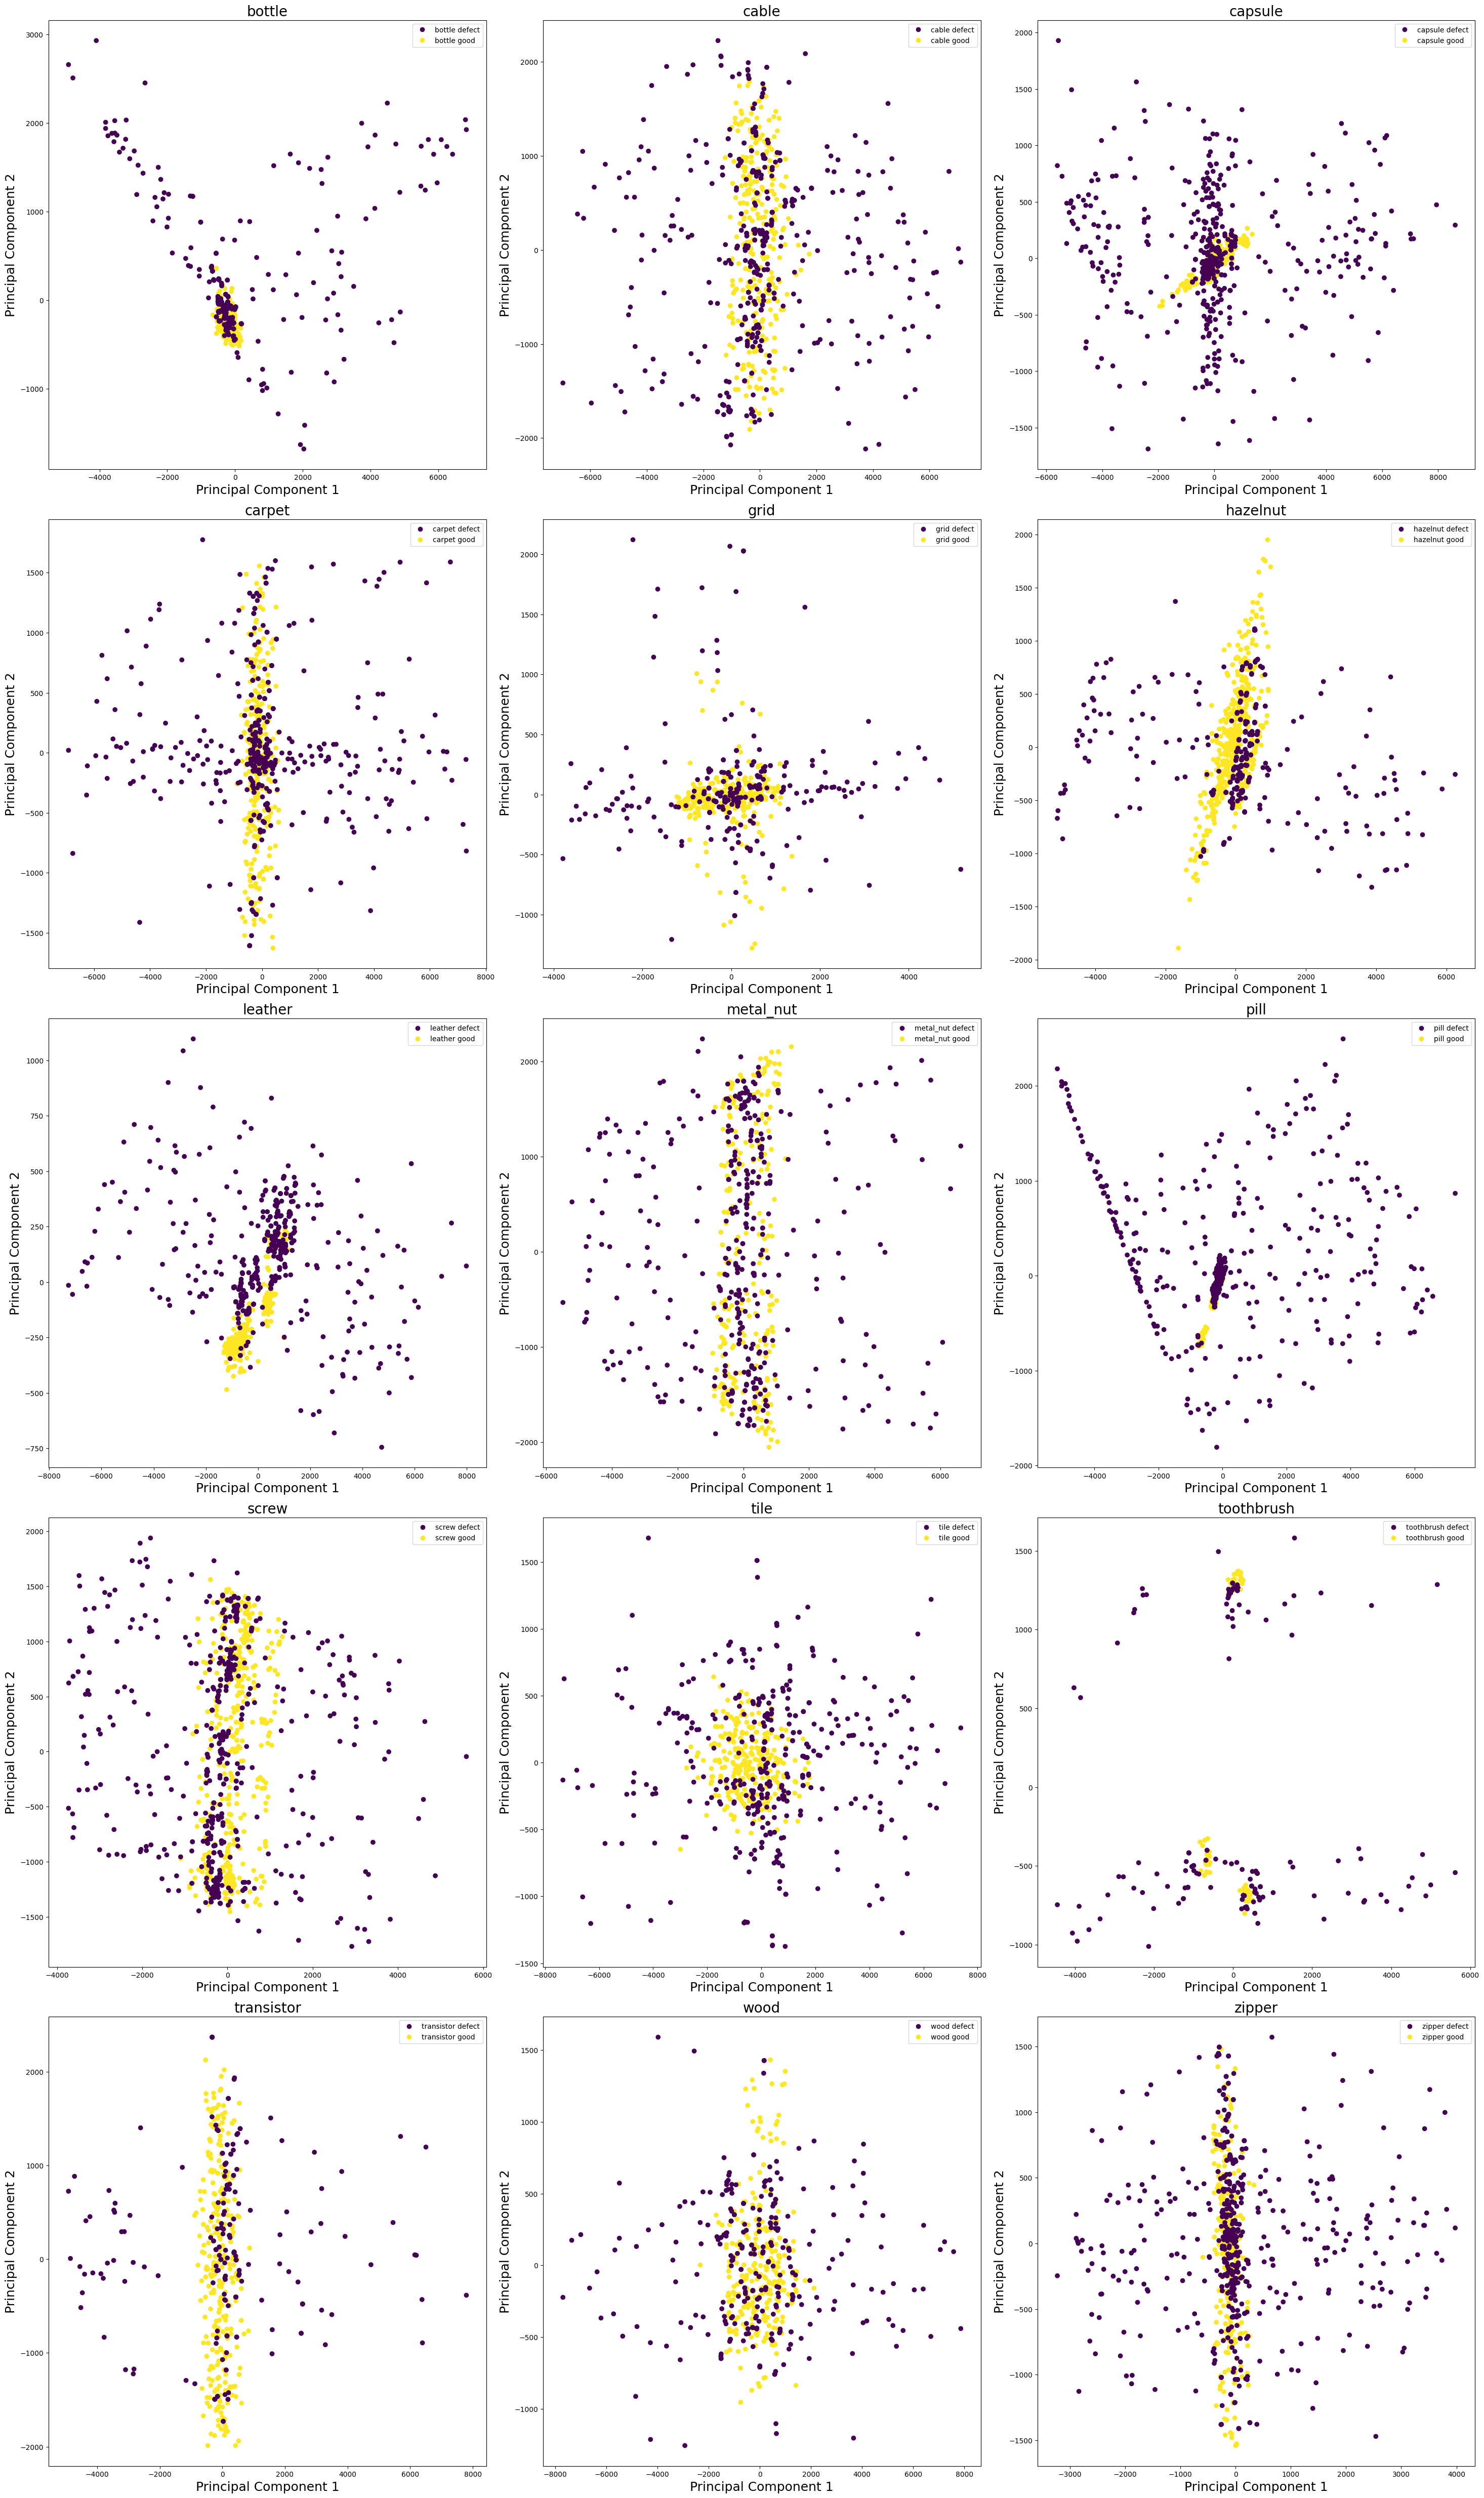

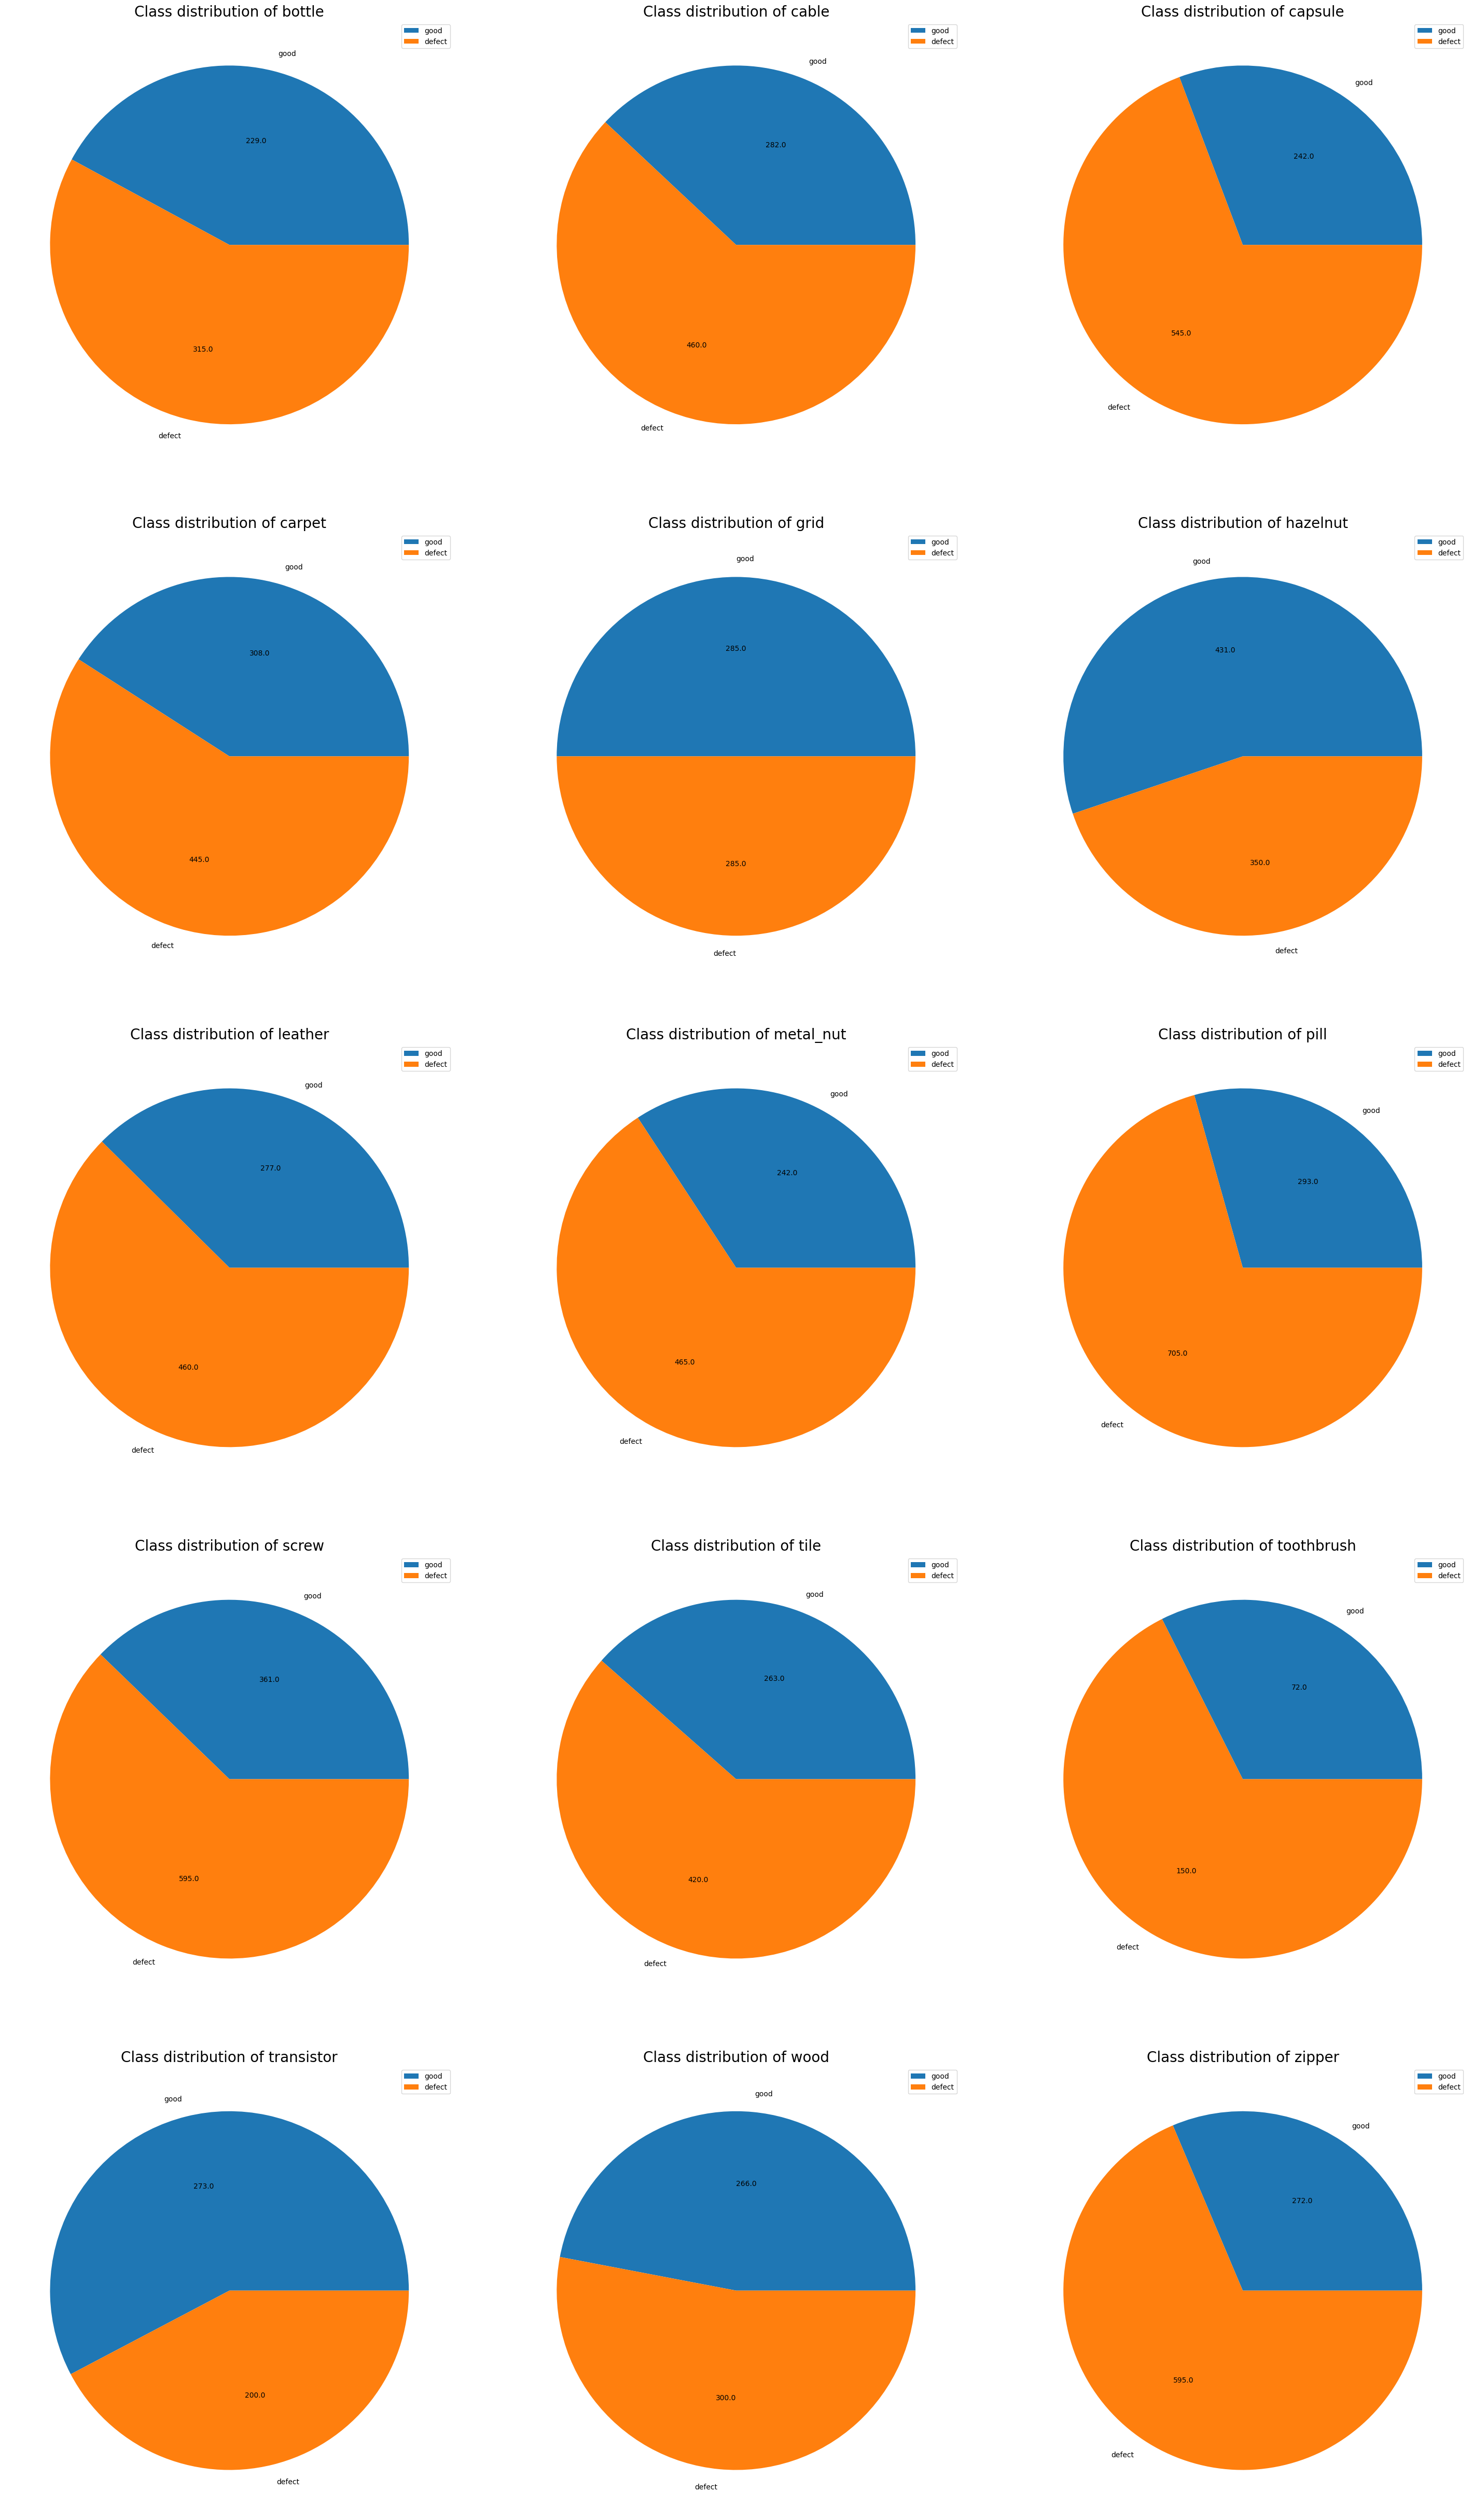

In [8]:
grouped_data_path = os.path.join(root_path, "data/grouped_data")
data_analysis(grouped_data_path, check_shape=True, check_embeddings=True, check_dist=True, image_prefix='augmented_and_grouped_data')

In [ ]:
grouped_data_path = os.path.join(root_path, "data/multi_classed_grouped_data")
data_analysis(grouped_data_path, check_shape=True, check_embeddings=True, check_dist=True, image_prefix='augmented_and_multi_class_grouped_data')